# Import Scikit Learn, Pandas and Numpy

In [1]:
import sklearn
import numpy as np
import pandas as pd

# 1. Read the Dataset using Pandas

In [2]:
data = pd.read_csv("data/amazon_baby.csv")

In [3]:
data

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


# 2. Exploratory Data Analysis

In [4]:
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


### The first observation is that we have cells with null review and they have rating. Those rows which contain those cells should be dropped from the data as they will confuse the model by acting like noise.

In [6]:
data.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


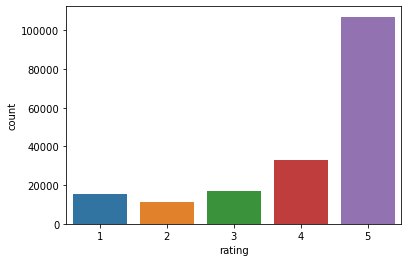

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(x='rating', data=data)

### The second observation is that we have imbalanced classes in our Data. At this project we will just use different metrics to measure model performance besides accuracy like recall, $F_{1}$ score and ROC.

# 3. Data Preprocessing
### Drop null rows using DataFrame.dropna()

In [8]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182384 entries, 0 to 182383
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    182384 non-null  object
 1   review  182384 non-null  object
 2   rating  182384 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


### Ignore the three stars ratings.

Because they are neutral, and dropp those rows with neutral reviews.
This step is done before building the word count vector to save memory space and computational power by not getting the word count vector for those neutral reviews.

In [9]:
data = data[data['rating'] != 3]
data.reset_index(drop=True, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165679 entries, 0 to 165678
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    165679 non-null  object
 1   review  165679 non-null  object
 2   rating  165679 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


### Build word count vectors

In [11]:
import pandas as pd
import numpy as np    
from sklearn.feature_extraction.text import CountVectorizer

def dictionarize(row):
    cv = CountVectorizer(
        analyzer = "word",  
        token_pattern = '[a-zA-Z0-9$&+:;=?@#|<>.^*()%!]+'
    )
    text = [row.loc['review']]
    cv_fit=cv.fit_transform(text)    
    word_list = cv.get_feature_names()
    count_list = cv_fit.toarray().sum(axis=0)
    dictionary = dict(zip(word_list,count_list))
    row['word_count'] = dictionary
    return row

data = data.apply(dictionarize, axis=1)

In [12]:
data.head()

,name,review,rating,word_count
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed..."
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable..."
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'a': 2, 'about': 1, 'and': 3, 'anything': 1, ..."
3,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'a': 2, 'all': 2, 'allow': 1, 'an': 1, 'and':..."
4,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ..."


In [13]:
data = data.assign(sentiment = (data['rating'] >= 4).astype(int))
data.head()

,name,review,rating,word_count,sentiment
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",1
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",1
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'a': 2, 'about': 1, 'and': 3, 'anything': 1, ...",1
3,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'a': 2, 'all': 2, 'allow': 1, 'an': 1, 'and':...",1
4,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ...",1


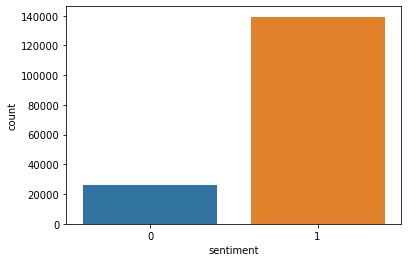

In [14]:
fig = sns.countplot(x='sentiment', data=data)

# 4. Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# 5. Logistic Regression Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

sentiment_pipeline = Pipeline(
    [
        ('Count_Vectorizer', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Logistic_Regression', LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='dict'))
    ],
    verbose=True
)

from sklearn import set_config
set_config(display='diagram')
sentiment_pipeline

Pipeline(steps=[('Count_Vectorizer', CountVectorizer()),
                ('TF-IDF', TfidfTransformer()),
                ('Logistic_Regression',
                 LogisticRegression(class_weight='dict', max_iter=1000))],
         verbose=True)

# 6. Pipeline Training

In [17]:
sentiment_pipeline.fit(train_set['review'], train_set['sentiment'])

[Pipeline] .. (step 1 of 3) Processing Count_Vectorizer, total=  10.9s
[Pipeline] ............ (step 2 of 3) Processing TF-IDF, total=   1.2s
[Pipeline]  (step 3 of 3) Processing Logistic_Regression, total=  19.2s


Pipeline(steps=[('Count_Vectorizer', CountVectorizer()),
                ('TF-IDF', TfidfTransformer()),
                ('Logistic_Regression',
                 LogisticRegression(class_weight='dict', max_iter=1000))],
         verbose=True)

### Plot Learning Curves

In [18]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    estimator.verbose = False
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    estimator.verbose = True
    return plt

# 7. Metrics

In [19]:
from sklearn.metrics import classification_report

y_pred = sentiment_pipeline.predict(test_set['review'])
print('Classification report:\n\n{}'.format(
    classification_report(test_set['sentiment'], y_pred))
)

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      5338
           1       0.95      0.98      0.96     27798

    accuracy                           0.94     33136
   macro avg       0.91      0.84      0.87     33136
weighted avg       0.93      0.94      0.93     33136



<module 'matplotlib.pyplot' from '/home/abdelrahman/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/matplotlib/pyplot.py'>

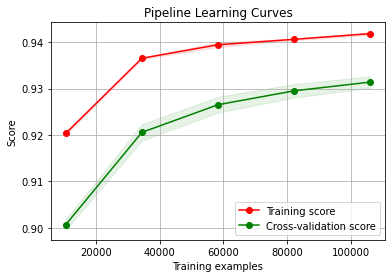

In [20]:
plot_learning_curve(sentiment_pipeline\
                    , 'Pipeline Learning Curves', train_set['review'], train_set['sentiment'])

Text(0.5, 1.0, 'Two-class Precision-Recall curve')

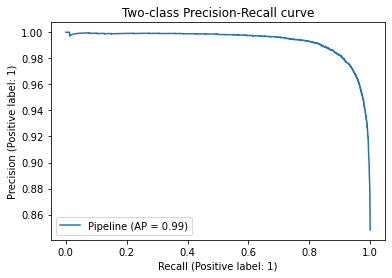

In [21]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(test_set['sentiment'], y_pred)
disp = plot_precision_recall_curve(sentiment_pipeline, test_set['review'], test_set['sentiment'])

disp.ax_.set_title('Two-class Precision-Recall curve')

Text(0.5, 1.0, 'Two-class ROC curve')

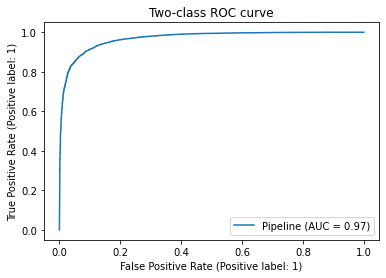

In [22]:
disp = plot_roc_curve(sentiment_pipeline, test_set['review'], test_set['sentiment'])
disp.ax_.set_title('Two-class ROC curve')

In [23]:
from sklearn.metrics import accuracy_score
y_pred_selected_words = sentiment_pipeline.predict(test_set['review'])
y_true_selected_words = test_set['sentiment']
accuracy_score(y_true_selected_words, y_pred_selected_words)
print('The accuracy of the sentiment_pipeline is',accuracy_score(y_true_selected_words, y_pred_selected_words))

The accuracy of the sentiment_pipeline is 0.9352064220183486


# Assignment
## 1. Use .apply() to build a new feature with the counts for each of the selected_words.

In [24]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing',\
                  'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [25]:
def dictionary_count(row):
    count_list = []
    for word in selected_words:
        count_list.append(row['word_count'].get(word, 0))
    dictionary = dict(zip(selected_words, count_list))
    row['selected_words'] = dictionary
    return row

data = data.apply(dictionary_count, axis=1)

In [26]:
data.head()

,name,review,rating,word_count,sentiment,selected_words
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",1,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am..."
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",1,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am..."
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'a': 2, 'about': 1, 'and': 3, 'anything': 1, ...",1,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am..."
3,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'a': 2, 'all': 2, 'allow': 1, 'an': 1, 'and':...",1,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am..."
4,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'a': 2, 'about': 2, 'adorable': 1, 'and': 2, ...",1,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am..."


In [27]:
from collections import Counter

counts = sum(map(Counter, data['selected_words']), Counter())
results = pd.DataFrame.from_dict(counts, orient='index', columns=['Sums'])\
            .sort_values(by=['Sums'], ascending=False)

In [28]:
results

,Sums
great,45238
love,40894
bad,3490
awesome,2247
amazing,1466
hate,1083
fantastic,983
terrible,745
horrible,743
awful,393


## 2. Create a new sentiment analysis model using only the selected_words as features

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import Normalizer

selected_words_pipeline = Pipeline(
    [
        ('Dictionary_Vectorizer', DictVectorizer(sparse=False, sort=False)),
        ('Scaler', StandardScaler()),
        ('Logistic_Regression', LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='dict'))
    ],
    verbose=True
)

from sklearn import set_config
set_config(display='diagram')
selected_words_pipeline

Pipeline(steps=[('Dictionary_Vectorizer',
                 DictVectorizer(sort=False, sparse=False)),
                ('Scaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(class_weight='dict', max_iter=1000))],
         verbose=True)

### Train-Test split

In [30]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=15)

### Training the selected_words_pipeline

In [31]:
selected_words_pipeline.fit(train_set['selected_words'], train_set['sentiment'])

[Pipeline]  (step 1 of 3) Processing Dictionary_Vectorizer, total=   1.8s
[Pipeline] ............ (step 2 of 3) Processing Scaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic_Regression, total=   0.3s


Pipeline(steps=[('Dictionary_Vectorizer',
                 DictVectorizer(sort=False, sparse=False)),
                ('Scaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(class_weight='dict', max_iter=1000))],
         verbose=True)

### selected_words_pipeline Metrics

In [32]:
from sklearn.metrics import classification_report

y_pred = selected_words_pipeline.predict(test_set['selected_words'])
print('Classification report:\n\n{}'.format(
    classification_report(test_set['sentiment'], y_pred))
)

Classification report:

              precision    recall  f1-score   support

           0       0.63      0.05      0.09      5292
           1       0.85      0.99      0.91     27844

    accuracy                           0.84     33136
   macro avg       0.74      0.52      0.50     33136
weighted avg       0.81      0.84      0.78     33136



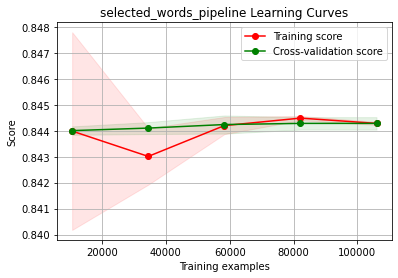

In [33]:
disp = plot_learning_curve(selected_words_pipeline, 'selected_words_pipeline Learning Curves', \
                           train_set['selected_words'], train_set['sentiment'])

Text(0.5, 1.0, 'Two-class Precision-Recall curve')

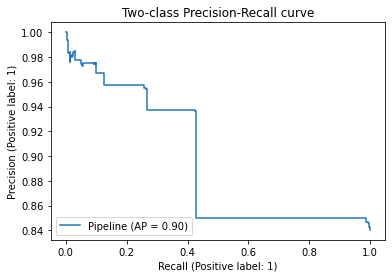

In [34]:
average_precision = average_precision_score(test_set['sentiment'], y_pred)
disp = plot_precision_recall_curve(selected_words_pipeline, test_set['selected_words'], test_set['sentiment'])

disp.ax_.set_title('Two-class Precision-Recall curve')

Text(0.5, 1.0, 'Two-class POC curve')

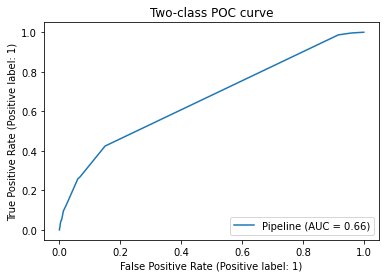

In [35]:
disp = plot_roc_curve(selected_words_pipeline, test_set['selected_words'], test_set['sentiment'])
disp.ax_.set_title('Two-class POC curve')

In [36]:
weights = dict(zip(selected_words, selected_words_pipeline['Logistic_Regression'].coef_[0]))
sorted_weights = pd.DataFrame.from_dict(weights, orient='index', columns=['Weights'])\
                                        .sort_values(by=['Weights'], ascending=False)
sorted_weights

,Weights
love,0.811297
great,0.462001
awesome,0.133644
amazing,0.076674
fantastic,0.066782
wow,0.000854
awful,-0.086924
hate,-0.127513
terrible,-0.141622
horrible,-0.146415


## 3. Comparing the accuracy of different sentiment analysis models: Using .predict()

In this task the accuracy of the sentiment_pipeline, selected_words_pipeline and majority_class. The first one has been calculated above.

In [37]:
from sklearn.metrics import accuracy_score
y_pred_selected_words = selected_words_pipeline.predict(test_set['selected_words'])
y_true_selected_words = test_set['sentiment']
accuracy_score(y_true_selected_words, y_pred_selected_words)
print('The accuracy of the selected_words_pipeline is', 
      accuracy_score(y_true_selected_words, y_pred_selected_words))

The accuracy of the selected_words_pipeline is 0.8434633027522935


In [38]:
majority_class = float(test_set[test_set['sentiment'] == 1].shape[0] / test_set.shape[0])
majority_class

0.8402945436986963

## 4. Interpreting the difference in performance between the models

In [39]:
diaper_champ_reviews = data.loc[data['name']=='Baby Trend Diaper Champ',\
                                ['review', 'selected_words', 'sentiment']]
diaper_champ_reviews

,review,selected_words,sentiment
284,Ok - newsflash. Diapers are just smelly. We\...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1
285,"My husband and I selected the Diaper ""Champ"" m...","{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0
286,Excellent diaper disposal unit. I used it in ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1
287,We love our diaper champ. It is very easy to ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1
288,Two girlfriends and two family members put me ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1
...,...,...,...
577,"Its a good product because its easy to use, an...","{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1
578,this works really well. I found it easier tha...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1
579,This truly is the champ of diapers. This produ...,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",1
580,I\'ve read all of the reviews of those of you ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0


In [40]:
diaper_champ_reviews['predicted_sentiment'] = \
                            sentiment_pipeline.predict_proba(diaper_champ_reviews['review'])[:, 1].tolist()
diaper_champ_reviews

,review,selected_words,sentiment,predicted_sentiment
284,Ok - newsflash. Diapers are just smelly. We\...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.748813
285,"My husband and I selected the Diaper ""Champ"" m...","{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0.474896
286,Excellent diaper disposal unit. I used it in ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.989838
287,We love our diaper champ. It is very easy to ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.953580
288,Two girlfriends and two family members put me ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.755316
...,...,...,...,...
577,"Its a good product because its easy to use, an...","{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.977647
578,this works really well. I found it easier tha...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.932741
579,This truly is the champ of diapers. This produ...,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",1,0.876490
580,I\'ve read all of the reviews of those of you ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",0,0.698252


In [41]:
diaper_champ_reviews = diaper_champ_reviews.sort_values(by=['predicted_sentiment'], ascending=False)
diaper_champ_reviews.head()

,review,selected_words,sentiment,predicted_sentiment
550,This is the best diaper pail. I was a little ...,"{'awesome': 0, 'great': 0, 'fantastic': 0, 'am...",1,0.999855
431,I have 2 kids in diapers and the diaper champ ...,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",1,0.999729
541,This is a great for dirty Diapers. I have had ...,"{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",1,0.999422
402,"This item is great, you can you any bags you w...","{'awesome': 0, 'great': 2, 'fantastic': 0, 'am...",1,0.998937
467,"This pail is by far the best! Great price, n...","{'awesome': 0, 'great': 1, 'fantastic': 0, 'am...",1,0.998878


In [42]:
diaper_champ_reviews['predicted_selected_word'] = \
                    selected_words_pipeline\
                    .predict_proba(diaper_champ_reviews['selected_words'])[:, 1].tolist()
diaper_champ_reviews.iloc[1]

review                     I have 2 kids in diapers and the diaper champ ...
selected_words             {'awesome': 0, 'great': 1, 'fantastic': 0, 'am...
sentiment                                                                  1
predicted_sentiment                                                 0.999729
predicted_selected_word                                             0.973781
Name: 431, dtype: object

In [43]:
diaper_champ_reviews.iloc[1]['review']

'I have 2 kids in diapers and the diaper champ has been great for us for 2 1/2 years. Easy to use and change. I love that it uses reg bags. :)'

In [44]:
diaper_champ_reviews.iloc[1]['selected_words']

{'awesome': 0,
 'great': 1,
 'fantastic': 0,
 'amazing': 0,
 'love': 1,
 'horrible': 0,
 'bad': 0,
 'terrible': 0,
 'awful': 0,
 'wow': 0,
 'hate': 0}